
develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Single and Multivariables) of a set of datapoints.

#### Import numpy, matplotlib.pyplot and any library you will need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read RegData csv file into numpy array

In [2]:
data = np.genfromtxt('RegData.csv',delimiter=',')

In [3]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y.
#### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [ ]:
X = data[:,0]
y=data[:,1]


#### Explore your data

In [ ]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [5]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

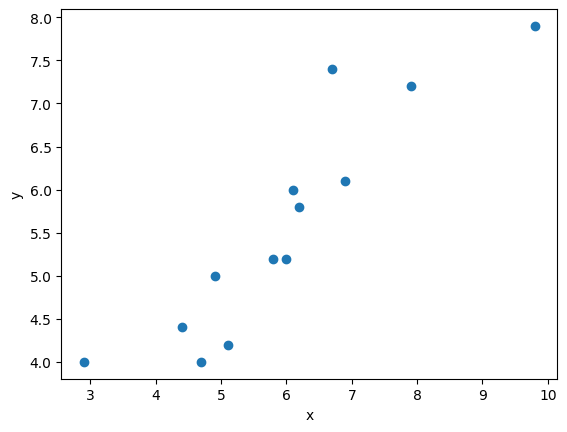

In [6]:
plt.plot(X,y,"o")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.

In [7]:
theta0 = 0
theta1 = 0
r = 0.0001 



### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.

In [8]:
hx = theta0 + theta1 * X
print(f"h(x):{hx}")

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Step3: Calculate the MSE Cost function 𝑱(theta_0,theta_1 ).
<b>Note:</b> You better use either dot product or norm square of the error vector.

In [9]:
hx = theta0 + theta1 * X

error = hx - y
mse = 0.5*np.linalg.norm(error) ** 2/(X.shape)
print(f"error vector :\n{error}")

print("j=",mse)




error vector :
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]
j= [16.30538448]


### Step4: Calculate the gradient components for theta_0 and theta_1.
<b>Note:</b> You can use the error vector calculated in the previous step.

In [10]:
hx = theta0 + theta1 * X
error= hx - y

gtheta0 = np.sum(error) / len(X)
gtheta1 = np.sum(error * X) / len(X)

gtheta0, gtheta1


(-5.56923073976923, -35.043846043215375)

### Step5: Update the parameters (simultaneously).

In [11]:
theta0=theta0 - r * gtheta0
theta1=theta1 - r * gtheta1
theta0,theta1

(0.0005569230739769231, 0.003504384604321538)

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
#### The objective from this step is to combine all the previous steps and iterate untill you either achieve the maximum number of iterations or reach the minimum.

In [12]:
theta0 = 0
theta1 = 0
r = 0.01
iterations = 1000
cost = []
for i in range(iterations):
    hx = theta0 + theta1 * X
    error= hx - y
    gtheta0 = np.sum(error) / len(X)
    gtheta1 = np.sum(error * X) / len(X)
    Gvector = np.array([[gtheta0, gtheta1]])
    theta0=theta0 - r * gtheta0
    theta1=theta1 - r * gtheta1
    mse = 0.5 * np.linalg.norm(error) ** 2 / (X.shape)
    cost.append(mse)
    print(f"****************** Iteration {i} ********************\n")
    print(f"h(x):{hx}\n")
    print()
    print(f"error vector :\n{error}\n")
    print("j=\n", mse)
    print()
    print("Gradient Vector:/n", gtheta0, gtheta1)
    print()
    print("norm of gradint",np.linalg.norm(Gvector))
    print()
    print("theta0\n", theta0)
    print("theta1\n", theta1)
    if i > 0 and abs(cost[i] - cost[i-1]) < 0.1:
        break
    

    


****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


error vector :
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j=
 [16.30538448]

Gradient Vector:/n -5.56923073976923 -35.043846043215375

norm of gradint 35.483622652335995

theta0
 0.0556923073976923
theta1
 0.35043846043215376
****************** Iteration 1 ********************

h(x):[1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]


error vector :
[-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]

j=
 [6.17560881]

Gradient Vector:/n -3.4270817500338526 -21.338452630007843

norm of gradint 21.611905283072655

theta0
 0.08996312489803082
theta1
 0.5638229867322322
*****

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [27]:
print("h(x) = y_predict: \n", theta0 + theta1 * X)
print()
print("actual",y)

h(x) = y_predict: 
 [2.71358359 6.07720593 4.48391127 7.13940279 8.82121418 6.25423895
 5.54610771 5.63462401 5.45759141 4.66094387 4.30687825 4.04132935
 5.28055881]

actual [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

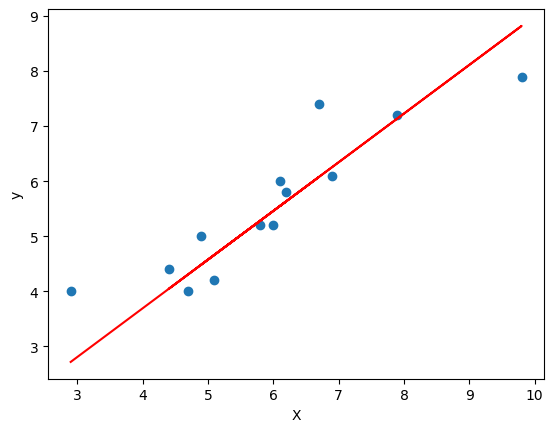

In [28]:
plt.scatter(X, y, label='Original Data')
plt.plot(X,  theta0 + theta1 * X, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


#### Use R2 score to evaluate LR equation output


In [29]:
from sklearn.metrics import r2_score

r2_score_value = r2_score(y, theta0 + theta1 * X)
r2_score_value


0.7448536460453759

## Plot loss function


### Plot loss vs. iterations

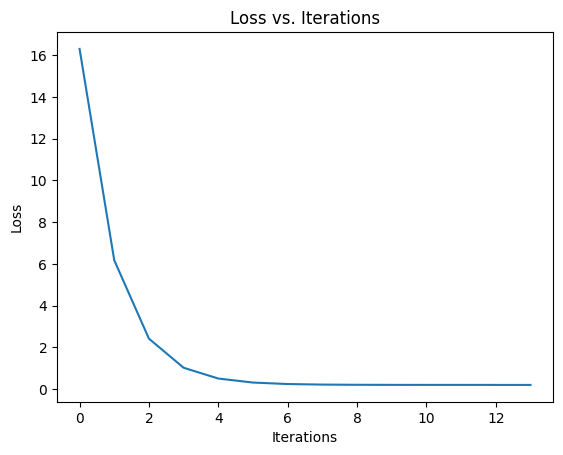

In [43]:
import matplotlib.pyplot as plt

# Plot loss vs. iterations
plt.plot(range(len(cost)), cost)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.show()


## Multivariate LR

#### Read MultiVarLR csv file into numpy array.
#### The first three columns are x1,x2, and x3.
#### The last column is the target label y.

In [44]:
data2 = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [45]:
data2

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [46]:
X2 = data2[:,0:3]
X2

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [47]:
y2 = np.array(data2[:,3]).reshape(25,1)
y2


array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

### Generalize your implementation to work for MultiVariables
#### Vectorize your implementation.
<b>Notes:</b>
- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.

In [54]:


X2_bias = np.column_stack((np.ones(len(X2)), X2))

theta = np.zeros((X2_bias.shape[1], 1))  
r = 0.0001  
iterations = 2576
cost = []

for i in range(iterations):
    hx = np.dot(X2_bias, theta)
    error = hx - y2
    gradient = np.dot(X2_bias.T, error) / len(X2_bias)
    theta = theta - r * gradient

    mse = 0.5 * np.linalg.norm(error) ** 2 / len(X2_bias)
    cost.append(mse)

    print(f"****************** Iteration {i} ********************\n")
    print(f"h(x):\n{hx}\n")
    print(f"error vector :\n{error}\n")
    print(f"J = {mse}\n")
    print(f"Gradient Vector:\n{gradient}\n")
    print(f"Norm of Gradient: {np.linalg.norm(gradient)}\n")
    print(f"Theta:\n{theta}\n")
    if i > 0 and abs(cost[i] - cost[i-1]) < 0.001:
        break


****************** Iteration 0 ********************

h(x):
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

error vector :
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]

J = 13405.98

Gradient Vector:
[[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]

Norm of Gradient: 22917.5459892197

Theta:
[[0.016204]
 [1.30758 ]
 [1.31472 ]
 [1.346708]]

****************** Iteration 1 ********************

h(x):
[[301.650244]
 [362.560348]
 [357.234064]
 [389.057244]
 [276.510624]
 [203.864004]
 [291.22502 ]
 [215.899264]
 [338.842264]
 [313.855728]
 [280.579308]
 [276.659996]
 [369.069972]
 [306.802308]
 [292.564588]
 [367.915192]
 [292.187588]
 [349.498828]
 [351.854372]
 [314.82572 ]
 [341.507404]
 [340.132136]
 [

#### Predict y values using the LR equation
##### X@thetas

In [55]:
X2_bias@theta

array([[152.98056641],
       [184.95222624],
       [181.60358768],
       [198.69080338],
       [140.57328885],
       [105.16958114],
       [149.77658131],
       [112.47082594],
       [174.21456269],
       [163.4743793 ],
       [143.68949377],
       [142.50788731],
       [186.70710059],
       [153.97674025],
       [150.72760513],
       [188.45122676],
       [145.87231374],
       [180.07173643],
       [177.68672091],
       [159.03510314],
       [175.46883028],
       [174.329854  ],
       [166.94401767],
       [152.11228309],
       [191.08194395]])

### Plot loss vs. iterations

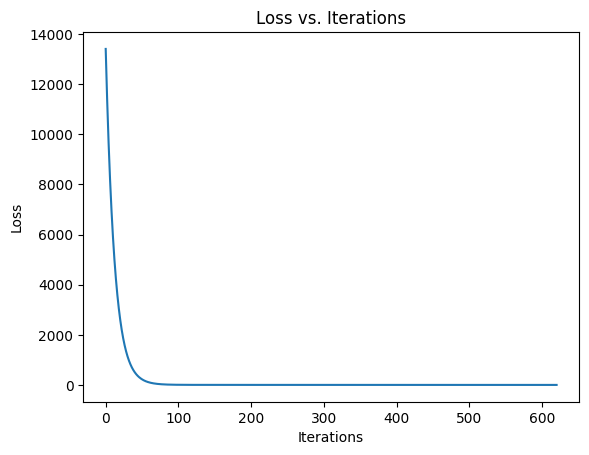

In [56]:

plt.plot(range(len(cost)), cost)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.show()


#### Use R2 score to evaluate LR equation output

In [57]:
from sklearn.metrics import r2_score

r2_score_value = r2_score(y2, X2_bias@theta)
r2_score_value


0.9879345951629844